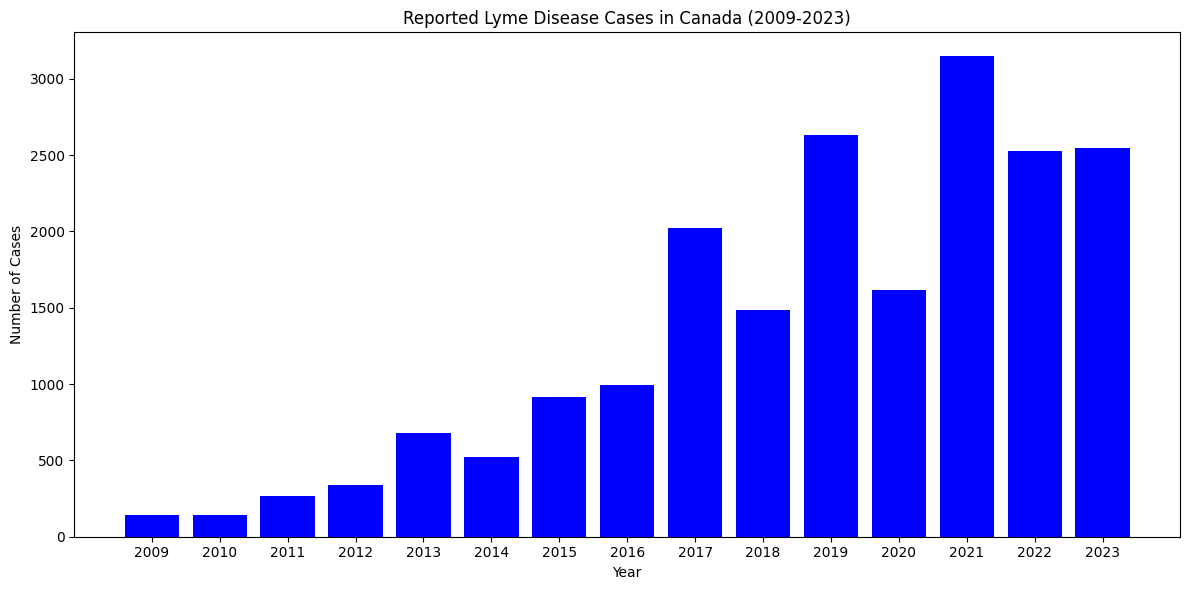

In [2]:
import matplotlib.pyplot as plt

# Data
years = [
    2009, 2010, 2011, 2012, 2013, 
    2014, 2015, 2016, 2017, 2018, 
    2019, 2020, 2021, 2022, 2023
]
cases = [
    144, 143, 266, 338, 682, 
    522, 917, 992, 2025, 1487, 
    2634, 1617, 3147, 2525, 2544
]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, cases, color='blue')

# Add title and labels
plt.title('Reported Lyme Disease Cases in Canada (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Add gridlines for better readability
#plt.grid(axis='y')

# Show the plot
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize

# Residual function
def residual(a, x):
    a0 = 1  # from boundary condition u(0) = 1
    a1, a2 = a
    return 2 * a2 + 1 + a1 * x + (a2 - 1) * x**2

# Objective function to minimize
def objective(a):
    # Integrate the square of the residual over [0, 1]
    integral, _ = quad(lambda x: residual(a, x)**2, 0, 1)
    return integral

# Initial guess for a1 and a2
initial_guess = [0, 0]

# Optimize
result = minimize(objective, initial_guess)

# Extract the coefficients
a1_opt, a2_opt = result.x
print(f"Optimized coefficients: a1 = {a1_opt}, a2 = {a2_opt}")

Optimized coefficients: a1 = 1.5960592214941962, a2 = -0.6256157954213357


In [7]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations
def equations(vars):
    a1, a2, a3, a4 = vars
    
    # Equation 1: 2.25a2 + 0.5a1 + 3.125a3 + 3.0625a4 + 0.75 = 0
    eq1 = 2.25 * a2 + 0.5 * a1 + 3.125 * a3 + 3.0625 * a4 + 0.75
    
    # Equation 2: 3a2 + a1 + 7a3 + 13a4 = 0
    eq2 = 3 * a2 + a1 + 7 * a3 + 13 * a4
    
    # Equation 3: a1 + 2a2 + 3a3 + 4a4 = 1
    eq3 = a1 + 2 * a2 + 3 * a3 + 4 * a4 - 1
    
    # Equation 4: Adding an additional equation for consistency
    eq4 = a2  # Setting a2 to be zero for simplicity (this can be adjusted)

    return [eq1, eq2, eq3, eq4]

# Initial guess for the coefficients [a1, a2, a3, a4]
initial_guess = [0, 0, 0, 0]

# Solve the system of equations
solution = fsolve(equations, initial_guess)

# Extract the coefficients
a1, a2, a3, a4 = solution

# Print the results
print(f"Coefficients:\n a1 = {a1}\n a2 = {a2}\n a3 = {a3}\n a4 = {a4}")

# Define the polynomial function
def u(x):
    return 1 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4

# Test the polynomial at a few points
x_values = np.linspace(0, 1, 5)
u_values = u(x_values)

print("u(x) values at x = [0, 0.25, 0.5, 0.75, 1]:")
for x, val in zip(x_values, u_values):
    print(f"u({x}) = {val}")

Coefficients:
 a1 = 2.6445783132530116
 a2 = -7.4041991525978405e-28
 a3 = -0.9819277108433735
 a4 = 0.32530120481927716
u(x) values at x = [0, 0.25, 0.5, 0.75, 1]:
u(0.0) = 1.0
u(0.25) = 1.6470726656626504
u(0.5) = 2.2198795180722892
u(0.75) = 2.67211031626506
u(1.0) = 2.987951807228915


In [5]:
department_fields = {
    "emergency": [
        "date", "daily_visits", "daily_admissions", "admission_rate",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "internal_med": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "surgery": [
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "beds_in_use", "total_beds", "occupancy_rate",
        "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason",
        "daily_revenue", "daily_profit"
    ],
    "pediatric": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "obgyn": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "cardio": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "orthopedic": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "beds_in_use", "total_beds", "occupancy_rate",
        "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "neurology": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "beds_in_use", "total_beds", "occupancy_rate",
        "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "oncology": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "radiology": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "equip_count", "equip_use",  "staff_patient_ratio"
    ],
    "pathology": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "equip_count", "equip_use", "staff_patient_ratio"
    ],
    "anesthesiology": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "equip_count", "equip_use",
        "staff_patient_ratio"
    ],
    "icu": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "psychiatry": ["daily_visits",
        "date", "daily_admissions", "admission_rate", "patient_days",
        "daily_discharge", "wait_time", "beds_in_use", "total_beds",
        "occupancy_rate", "daily_readmission", "readmission_rate", "bed_turnover",
        "employee_count", "employee_resign", "employee_turnover",
        "equip_count", "equip_use", "staff_patient_ratio", "refer_reason"
    ],
    "physical_therapy": ["daily_visits",
        "date", "admission_rate", "daily_discharge", "daily_revenue", "daily_profit",
        "beds_in_use", "total_beds", "occupancy_rate", "employee_count",
        "employee_resign", "employee_turnover", "equip_count", "equip_use",
        "staff_patient_ratio"
    ],
    "resp_therapy": ["daily_visits",
        "date", "admission_rate", "daily_discharge", "daily_revenue", "daily_profit",
        "beds_in_use", "total_beds", "occupancy_rate", "employee_count",
        "employee_resign", "employee_turnover", "equip_count", "equip_use",
        "staff_patient_ratio"
    ],
    "nutrition_diet": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "employee_count", "employee_resign", "staff_patient_ratio",
        "employee_turnover"
    ],
    "pharmacy": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "equip_count", "equip_use",  "staff_patient_ratio"
    ],
    "laboratory": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "equip_count", "equip_use",  "staff_patient_ratio"
    ],
    "infection_control": ["daily_visits",
        "date", "admission_rate", "daily_discharge", "daily_readmission",
        "readmission_rate", "occupancy_rate",  "staff_patient_ratio"
    ],
    "medical_records": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "employee_count",
        "employee_resign", "employee_turnover", "staff_patient_ratio"
    ],
    "admin": ["daily_visits",
        "date", "daily_revenue", "daily_profit", "employee_count",
        "employee_resign", "employee_turnover", "staff_patient_ratio"
    ],
    "security": [
        "date", "employee_count", "employee_resign", "employee_turnover"
    ]
}


In [6]:
import pandas as pd

import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)

# Define the departments and repeat each 10 times

departments = [
    "emergency", "internal_med", "surgery", "pediatric", "obgyn", "cardio",
    "orthopedic", "neurology", "oncology", "radiology", "pathology", "anesthesiology",
    "icu", "psychiatry", "physical_therapy", "resp_therapy", "nutrition_diet",
    "pharmacy", "laboratory", "infection_control", "medical_records", "admin", "security"
] * 100
# Creating the date range
dt = pd.date_range(start='2024-01-01', end='2024-04-09')
dt_range = np.tile(dt, int(np.ceil(len(departments) / len(dt))))[:len(departments)]

# Ensure we have exactly 2300 observations
departments = departments[:2300]

# Generate fake data
#np.random.seed(42)
daily_visits = np.random.randint(5, 50, size=len(departments))
total_beds = np.random.randint(10, 80, size=len(departments))
beds_in_use = np.minimum(total_beds, np.random.randint(5, 70, size=len(departments)))  # Ensure beds_in_use <= total_beds
daily_discharge = np.minimum(total_beds, np.random.randint(1, 40, size=len(departments)))

# Calculate daily admissions
daily_admissions = np.minimum(daily_visits, np.maximum(0, total_beds - beds_in_use - daily_discharge))
admission_rate = np.round(daily_admissions / daily_visits, 2)

# Employee data
employee_count = np.random.randint(10, 20, size=100)
employee_resign = np.random.randint(0, 2, size=100)

# Corrections data
ctf_daily = np.random.randint(2, 20, size=len(departments))
daily_profit = np.random.randint(1000, 20000, size=len(departments))
daily_revenue = daily_profit + ctf_daily
ctf_daily = daily_revenue - daily_profit

staff_patient_ratio = ["1:{}".format(np.random.randint(1, 5)) for _ in range(len(departments))]

data = {
    "date": dt_range,
    "departments": departments,
    "daily_visits": daily_visits,
    "daily_admissions": daily_admissions,
    "admission_rate": admission_rate,
    "patient_days": np.random.randint(10, 150, size=len(departments)),
    "daily_discharge": daily_discharge,
    "wait_time": np.random.randint(5, 60, size=len(departments)),
    "daily_revenue": daily_revenue,
    "ctf_daily": ctf_daily,
    "daily_profit":  daily_profit,
    "ctp_daily": np.random.randint(3, 25, size=len(departments)),
    "beds_in_use": beds_in_use,
    "total_beds": total_beds,
    "occupancy_rate": np.round(beds_in_use / total_beds, 2),
    "daily_readmission": np.random.randint(0, 5, size=len(departments)),
    "readmission_rate": np.round(np.random.uniform(0.0, 0.2, size=len(departments)), 2),
    "bed_turnover": np.round(daily_admissions / total_beds, 1),
    "employee_count": np.tile(employee_count, len(departments) // 100),
    "employee_resign": np.tile(employee_resign, len(departments) // 100),
    "employee_turnover": np.round(np.random.uniform(0.0, 0.05, size=len(departments)), 3),
    "equip_count": np.random.randint(10, 60, size=len(departments)),
    "equip_use": np.round(np.random.uniform(0.5, 1.0, size=len(departments)), 1),
   "staff_patient_ratio": staff_patient_ratio,
    "refer_reason": np.random.choice(
        ["Accident", "Chronic Illness", "Elective Procedure", "Child Health", "Prenatal", "Cardiac Issues",
         "Joint Issues", "Nervous System", "Cancer", "Imaging", "Lab Tests", "Pre/Post Surgery", "Critical Care",
         "Mental Health", "Rehabilitation", "Breathing Disorders"], size=len(departments))
}

# Create DataFrame
df = pd.DataFrame(data)
# Iterate over the DataFrame and set fields to 0 if the department is not in the department_fields
for department, fields in department_fields.items():
    df.loc[df['departments'] == department, fields] = df.loc[df['departments'] == department, fields]
    all_fields = set(df.columns)
    applicable_fields = set(fields)
    fields_to_zero = list(all_fields - applicable_fields)
    df.loc[df['departments'] == department, fields_to_zero] = 0


df['departments']= departments
df.set_index('date', inplace=True)
#df['daily_revenue'] = df['daily_revenue'].str.replace('$', '').str.replace(',', '').astype(float)
#df['ctf_daily'] = df['ctf_daily'].str.replace('$', '').str.replace(',', '').astype(float)
#df['daily_profit'] = df['daily_profit'].str.replace('$', '').str.replace(',', '').astype(float)
df['employee_turnover'] = round(df['employee_resign'] / df['employee_count'],2)
df.fillna(0, inplace=True)

# Generate a unique doctor ID for each department
#df['doctor_id'] = df.groupby('departments').ngroup() + 1

def generate_doctor_id(df, department_col='departments'):
    df['numeric_id'] = df.groupby(department_col).ngroup() + 1
    df['doctor_id'] = df[department_col].str[:3].str.upper() + df['numeric_id'].astype(str)
    df.drop('numeric_id', axis=1, inplace=True)
    return df
df = generate_doctor_id(df)
def add_day_of_week(df):
    
    df.index = pd.to_datetime(df.index)  # Ensure the index is a DatetimeIndex
    df['day_of_week'] = df.index.day_name()
    # Numerical label for day (Monday=0, ..., Sunday=6)
    return df

add_day_of_week(df)
print(df.shape)
df.head()

(2300, 26)


,departments,daily_visits,daily_admissions,admission_rate,patient_days,daily_discharge,wait_time,daily_revenue,ctf_daily,daily_profit,ctp_daily,beds_in_use,total_beds,occupancy_rate,daily_readmission,readmission_rate,bed_turnover,employee_count,employee_resign,employee_turnover,equip_count,equip_use,staff_patient_ratio,refer_reason,doctor_id,day_of_week
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01,emergency,42,0,0.00,0,26,5,0,0,0,0,26,26,1.00,0,0.00,0.0,15,0,0.00,33,0.9,1:2,Lab Tests,EME4,Monday
2024-01-02,internal_med,37,0,0.00,43,12,20,0,0,0,0,27,27,1.00,1,0.05,0.0,19,1,0.05,38,0.8,1:1,Breathing Disorders,INT7,Tuesday
2024-01-03,surgery,0,0,0.00,54,30,0,5230,0,5224,0,49,49,1.00,0,0.20,0.0,11,0,0.00,42,0.5,1:4,Breathing Disorders,SUR23,Wednesday
2024-01-04,pediatric,22,15,0.68,45,7,26,0,0,0,0,57,79,0.72,4,0.09,0.2,13,1,0.08,58,0.9,1:3,Cardiac Issues,PED16,Thursday
2024-01-05,obgyn,13,0,0.00,145,13,31,0,0,0,0,13,13,1.00,3,0.01,0.0,18,1,0.06,57,1.0,1:2,Breathing Disorders,OBG12,Friday


In [12]:
df.tail().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-04-05 to 2024-04-09
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   departments          5 non-null      object 
 1   daily_visits         5 non-null      int32  
 2   daily_admissions     5 non-null      int32  
 3   admission_rate       5 non-null      float64
 4   patient_days         5 non-null      int32  
 5   daily_discharge      5 non-null      int32  
 6   wait_time            5 non-null      int32  
 7   daily_revenue        5 non-null      int32  
 8   ctf_daily            5 non-null      int32  
 9   daily_profit         5 non-null      int32  
 10  ctp_daily            5 non-null      int32  
 11  beds_in_use          5 non-null      int32  
 12  total_beds           5 non-null      int32  
 13  occupancy_rate       5 non-null      float64
 14  daily_readmission    5 non-null      int32  
 15  readmission_rate     5 

In [16]:
import pandas as pd

# Define the data with corrected column names and formats
data = {
    "date":pd.date_range(start="2024-11-01", periods=7, freq='D'),
    "departments": ["surgery", "pediatric", "obgyn", "neurology", "oncology", "radiology", "pathology"],
    "doctor_id": ["D001", "D002", "D003", "D004", "D005", "D006", "D007"],
    "day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "daily_visits": [12, 24, 30, 7, 9, 20, 15],
    "daily_admissions": [7, 14, 10, 3, 4, 8, 9],
    "admission_rate": [0.5833, 0.5833, 0.3333, 0.4286, 0.4444, 0.4, 0.6],
    "patient_days": [5, 3, 2, 7, 8, 3, 2],
    "daily_discharge": [4, 7, 12, 3, 5, 14, 8],
    "wait_time": [10, 25, 12, 20, 10, 20, 10],
    "daily_revenue": [700000, 400000, 550000, 400000, 350000, 500000, 450000],
    "ctf_daily": [0] * 7,
    "daily_profit": [400000, 100000, 250000, 100000, 50000, 200000, 150000],
    "ctp_daily": [0] * 7,
    "beds_in_use": [9, 16, 12, 5, 6, 10, 11],
    "total_beds": [16, 23, 19, 12, 13, 17, 18],
    "occupancy_rate": [0.5625, 0.6957, 0.6316, 0.4167, 0.4615, 0.5882, 0.6111],
    "daily_readmission": [2, 5, 3, 1, 1, 2, 3],
    "readmission_rate": [0.5, 0.7143, 0.25, 0.3333, 0.2, 0.1429, 0.375],
    "bed_turnover": [1.25, 0.4286, 0.1667, 2.3333, 1.6, 0.2143, 0.25],
    "employee_count": [15, 24, 45, 14, 9, 30, 15],
    "employee_resign": [2, 2, 1, 1, 3, 2, 1],
    "employee_turnover": [0.1333, 0.0833, 0.0222, 0.0714, 0.3333, 0.0667, 0.0667],
    "equip_count": [18, 8, 10, 7, 10, 15, 9],
    "equip_use": [10, 8, 6, 4, 8, 12, 7],
    "staff_patient_ratio": ["5:4", "1:1", "3:2", "2:1", "1:1", "3:2", "1:1"],
    "refer_reason": ["surgical", "overwhelmed", "specialist", "lab", "overwhelmed", "equipment", "capacity"]
}

# Create the DataFrame
df = pd.DataFrame(data)

df.set_index('date', inplace=True)
# Display the DataFrame
df


,departments,doctor_id,day_of_week,daily_visits,daily_admissions,admission_rate,patient_days,daily_discharge,wait_time,daily_revenue,ctf_daily,daily_profit,ctp_daily,beds_in_use,total_beds,occupancy_rate,daily_readmission,readmission_rate,bed_turnover,employee_count,employee_resign,employee_turnover,equip_count,equip_use,staff_patient_ratio,refer_reason
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-11-01,surgery,D001,Monday,12,7,0.5833,5,4,10,700000,0,400000,0,9,16,0.5625,2,0.5000,1.2500,15,2,0.1333,18,10,5:4,surgical
2024-11-02,pediatric,D002,Tuesday,24,14,0.5833,3,7,25,400000,0,100000,0,16,23,0.6957,5,0.7143,0.4286,24,2,0.0833,8,8,1:1,overwhelmed
2024-11-03,obgyn,D003,Wednesday,30,10,0.3333,2,12,12,550000,0,250000,0,12,19,0.6316,3,0.2500,0.1667,45,1,0.0222,10,6,3:2,specialist
2024-11-04,neurology,D004,Thursday,7,3,0.4286,7,3,20,400000,0,100000,0,5,12,0.4167,1,0.3333,2.3333,14,1,0.0714,7,4,2:1,lab
2024-11-05,oncology,D005,Friday,9,4,0.4444,8,5,10,350000,0,50000,0,6,13,0.4615,1,0.2000,1.6000,9,3,0.3333,10,8,1:1,overwhelmed
2024-11-06,radiology,D006,Saturday,20,8,0.4000,3,14,20,500000,0,200000,0,10,17,0.5882,2,0.1429,0.2143,30,2,0.0667,15,12,3:2,equipment
2024-11-07,pathology,D007,Sunday,15,9,0.6000,2,8,10,450000,0,150000,0,11,18,0.6111,3,0.3750,0.2500,15,1,0.0667,9,7,1:1,capacity


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2024-11-01 to 2024-11-07
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   departments          7 non-null      object 
 1   doctor_id            7 non-null      object 
 2   day_of_week          7 non-null      object 
 3   daily_visits         7 non-null      int64  
 4   daily_admissions     7 non-null      int64  
 5   admission_rate       7 non-null      float64
 6   patient_days         7 non-null      int64  
 7   daily_discharge      7 non-null      int64  
 8   wait_time            7 non-null      int64  
 9   daily_revenue        7 non-null      int64  
 10  ctf_daily            7 non-null      int64  
 11  daily_profit         7 non-null      int64  
 12  ctp_daily            7 non-null      int64  
 13  beds_in_use          7 non-null      int64  
 14  total_beds           7 non-null      int64  
 15  occupancy_rate       7 

In [18]:
df.to_csv('fake_healthcare_2.csv')

In [29]:
df['doctor_id'].unique()

array([ 4,  7, 23, 16, 12,  3, 14, 10, 13, 20, 15,  2,  5, 19, 18, 21, 11,
       17,  8,  6,  9,  1, 22])

In [21]:
df.index

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
               '2024-04-08', '2024-04-09'],
              dtype='datetime64[ns]', name='date', length=2300, freq=None)

In [22]:
df1 = pd.read_csv('fake_healthcare.csv')
df1.index

RangeIndex(start=0, stop=2300, step=1)

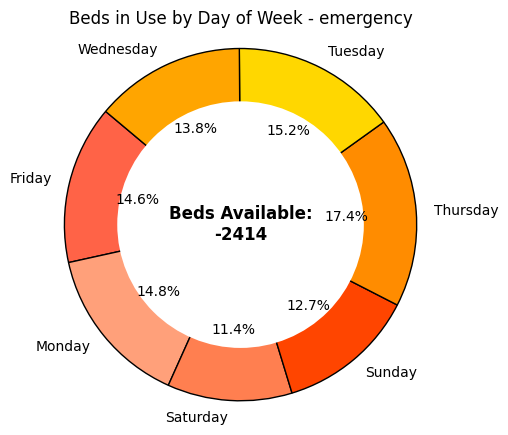

In [4]:


def plot_beds_in_use(df, department):
    # Filter the DataFrame for the specified department
    department_df = df[df['departments'] == department]
    
    if department_df.empty:
        print(f"No data available for the department: {department}")
        return
    
    # Aggregate beds_in_use by day_of_week
    agg_df = department_df.groupby('day_of_week').agg({'beds_in_use': 'sum', 'total_beds': 'first'}).reset_index()
    agg_df['beds_available'] = agg_df['total_beds'] - agg_df['beds_in_use']
    
    # Check for NaN or invalid values
    if agg_df.isna().any().any():
        print("NaN values found in the aggregated data.")
        print(agg_df)
        return

    if (agg_df['beds_in_use'] < 0).any() or (agg_df['total_beds'] <= 0).any():
        print("Invalid bed counts found in the aggregated data.")
        print(agg_df)
        return

    # Define warm colors
    colors = ['#FF6347', '#FFA07A', '#FF7F50', '#FF4500', '#FF8C00', '#FFD700', '#FFA500']

    # Plotting
    plt.figure(figsize=(5, 5))
    plt.pie(agg_df['beds_in_use'], labels=agg_df['day_of_week'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

    # Draw a circle to make it a doughnut plot
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Display beds available in the center
    plt.text(0, 0, f'Beds Available:\n{agg_df["beds_available"].sum()}',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=12, weight='bold')

    plt.title(f'Beds in Use by Day of Week - {department}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Call the function to generate the plot for the 'admin' department
plot_beds_in_use(df, 'emergency')


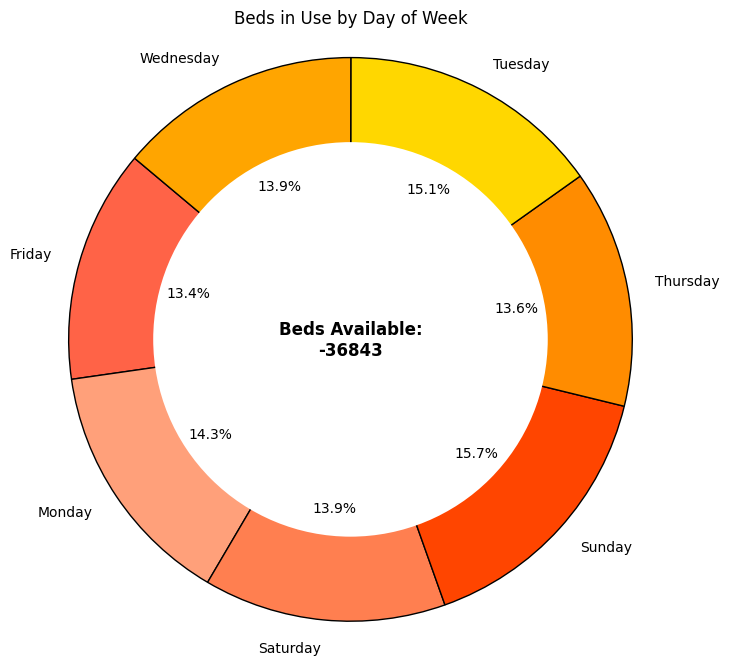

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_beds_in_use(df):
   
    # Aggregate beds_in_use by day_of_week
    agg_df = df.groupby('day_of_week').agg({'beds_in_use': 'sum', 'total_beds': 'first'}).reset_index()
    agg_df['beds_available'] = agg_df['total_beds'] - agg_df['beds_in_use']

    # Define warm colors
    colors = ['#FF6347', '#FFA07A', '#FF7F50', '#FF4500', '#FF8C00', '#FFD700', '#FFA500']

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(agg_df['beds_in_use'], labels=agg_df['day_of_week'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

    # Draw a circle to make it a doughnut plot
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Display beds available in the center
    plt.text(0, 0, f'Beds Available:\n{agg_df["beds_available"].sum()}',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=12, weight='bold')

    plt.title('Beds in Use by Day of Week')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


# Call the function to generate the plot
plot_beds_in_use(df)


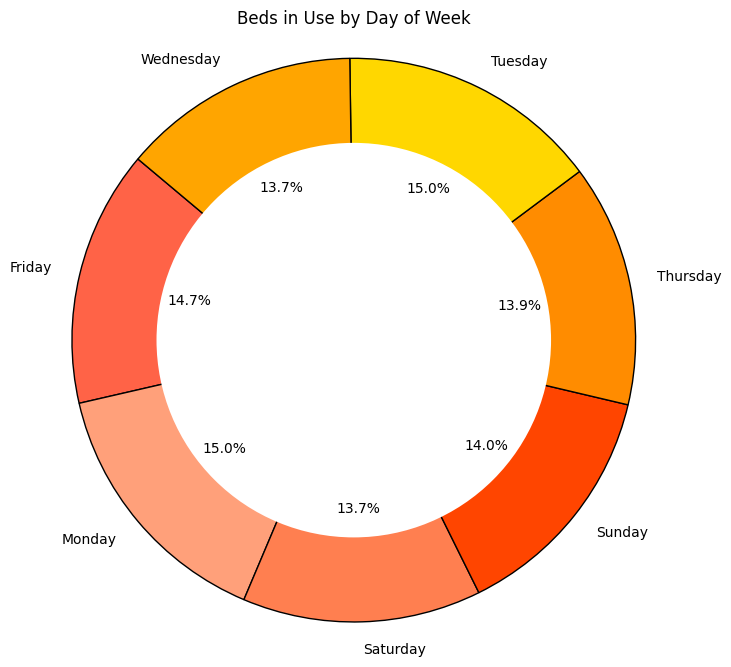

In [ ]:
# Aggregate beds_in_use by day_of_week
agg_df = df.groupby('day_of_week')['beds_in_use'].sum().reset_index()

# Define warm colors
colors = ['#FF6347', '#FFA07A', '#FF7F50', '#FF4500', '#FF8C00', '#FFD700', '#FFA500']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(agg_df['beds_in_use'], labels=agg_df['day_of_week'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Draw a circle to make it a doughnut plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Beds in Use by Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

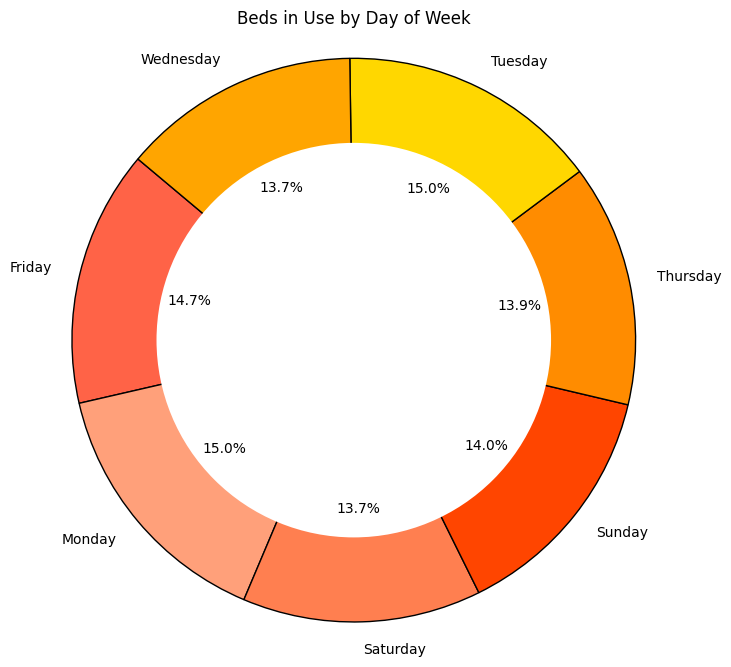

In [25]:
# Aggregate beds_in_use by day_of_week
agg_df = df.groupby('day_of_week')['beds_in_use'].sum().reset_index()

# Define warm colors
colors = ['#FF6347', '#FFA07A', '#FF7F50', '#FF4500', '#FF8C00', '#FFD700', '#FFA500']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(agg_df['beds_in_use'], labels=agg_df['day_of_week'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Draw a circle to make it a doughnut plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Beds in Use by Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\cyto\AppData\Local\Temp\ipykernel_11096\1349851596.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_range
C:\Users\cyto\AppData\Local\Temp\ipykernel_11096\1349851596.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\cyto\AppData\Local\Temp\ipykernel_11096\1349851596.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

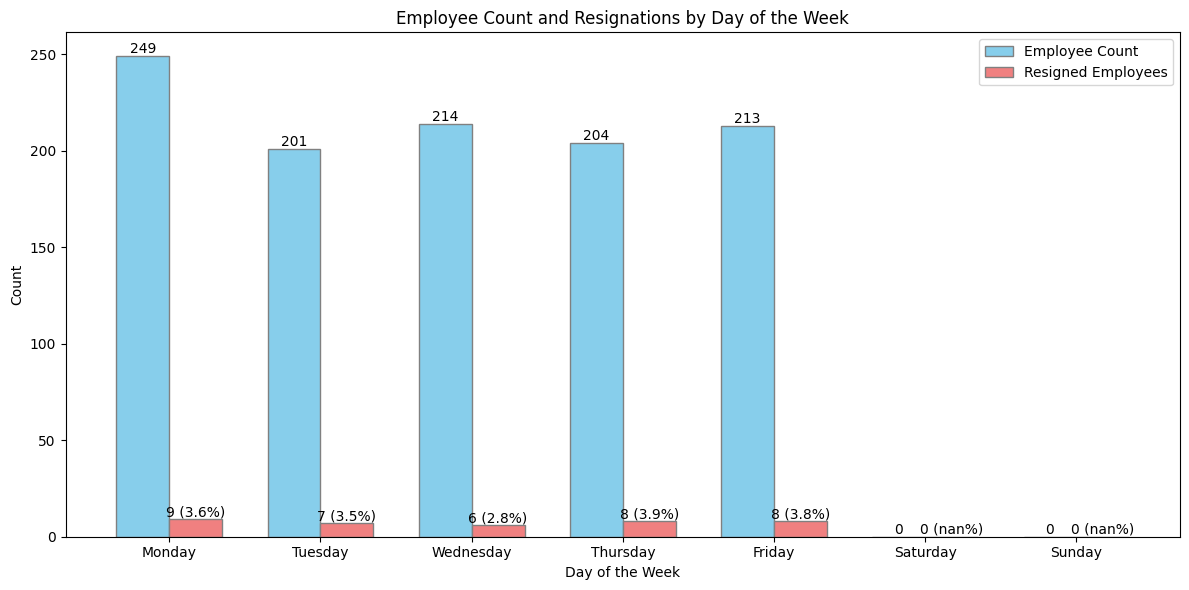

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_employee_resignations(df, department=None, days_filter=None):
      
    # Filter by department if specified
    if department:
        df = df[df['departments'] == department]
    
    # Create a new 'date' column based on a date range or other datetime data if 'date' column doesn't exist
    if 'date' not in df.columns:
        start_date = '2024-01-01'
        end_date = '2024-04-10'
        date_range = pd.date_range(start=start_date, end=end_date, periods=len(df))  # Adjust periods as needed
        df['date'] = date_range

    # Ensure 'date' column is correctly set as datetime
    df['date'] = pd.to_datetime(df['date'])

    # Extract day of the week (0 = Monday, 6 = Sunday)
    df['day_of_week'] = df['date'].dt.dayofweek
    
    # Filter by specific days if specified
    if days_filter:
        df = df[df['day_of_week'].isin(days_filter)]
    
    # Calculate total employee count and resigned employees count of the week
    daily_attendance = df.groupby('day_of_week')[['employee_count', 'employee_resign']].sum()
    
    # Reindex to include all days of the week and fill missing values with zero
    daily_attendance = daily_attendance.reindex(range(7), fill_value=0)

    # Calculate percentage of resignations relative to total employee count
    daily_attendance['resignation_percentage'] = (daily_attendance['employee_resign'] / daily_attendance['employee_count']) * 100

    # Labels for days of the week
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Plotting total employee count and resigned employees count of the week
    plt.figure(figsize=(12, 6))

    # Width of the bars
    bar_width = 0.35

    # Position of bars on X-axis
    r1 = range(len(days))
    r2 = [x + bar_width for x in r1]

    bars1 = plt.bar(r1, daily_attendance['employee_count'], color='skyblue', width=bar_width, edgecolor='grey', label='Employee Count')
    bars2 = plt.bar(r2, daily_attendance['employee_resign'], color='lightcoral', width=bar_width, edgecolor='grey', label='Resigned Employees')

    plt.xlabel('Day of the Week')
    plt.ylabel('Count')
    plt.title('Employee Count and Resignations by Day of the Week')
    plt.xticks([r + bar_width / 2 for r in range(len(days))], days)
    plt.legend()

    # Adding percentages as annotations
    for bar1, bar2 in zip(bars1, bars2):
        height1 = bar1.get_height()
        height2 = bar2.get_height()
        idx = bars1.index(bar1)
        plt.text(bar1.get_x() + bar1.get_width() / 2, height1, f'{int(height1)}', ha='center', va='bottom', fontsize=10)
        plt.text(bar2.get_x() + bar2.get_width() / 2, height2, f'{int(height2)} ({daily_attendance.loc[idx]["resignation_percentage"]:.1f}%)', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Example usage:
# df is your DataFrame containing the data
plot_employee_resignations(df, department='admin', days_filter=[0, 1, 2, 3, 4])


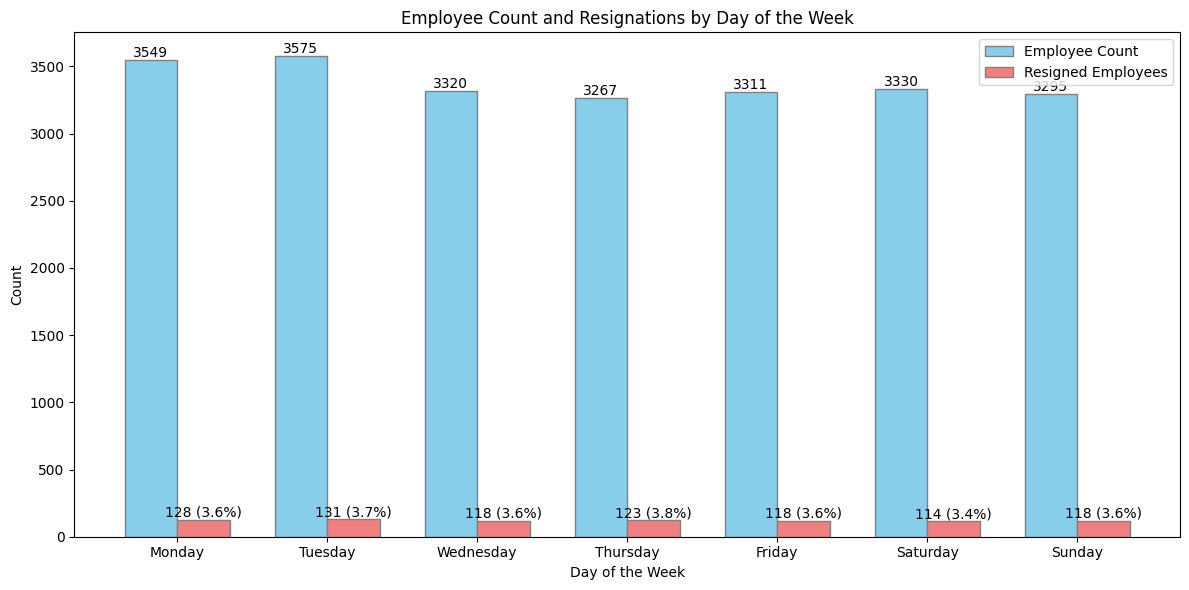

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if 'date' column exists in your DataFrame
if 'date' not in df.index:
    # Create a new 'date' column based on a date range or other datetime data
    start_date = '2024-01-01'
    end_date = '2024-04-10'
    date_range = pd.date_range(start=start_date, end=end_date, periods=len(df))  # Adjust periods as needed

    df['date'] = date_range

# Ensure 'date' column is correctly set as datetime
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Calculate total employee count and resigned employees count of the week
daily_attendance = df.groupby('day_of_week')[['employee_count', 'employee_resign']].sum()

# Calculate percentage of resignations relative to total employee count
daily_attendance['resignation_percentage'] = (daily_attendance['employee_resign'] / daily_attendance['employee_count']) * 100

# Labels for days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Plotting total employee count and resigned employees count of the week
plt.figure(figsize=(12, 6))

# Width of the bars
bar_width = 0.35

# Position of bars on X-axis
r1 = range(len(days))
r2 = [x + bar_width for x in r1]

bars1 = plt.bar(r1, daily_attendance['employee_count'], color='skyblue', width=bar_width, edgecolor='grey', label='Employee Count')
bars2 = plt.bar(r2, daily_attendance['employee_resign'], color='lightcoral', width=bar_width, edgecolor='grey', label='Resigned Employees')

plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Employee Count and Resignations by Day of the Week')
plt.xticks([r + bar_width / 2 for r in range(len(days))], days)
plt.legend()

# Adding percentages as annotations
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    idx = bars1.index(bar1)
    plt.text(bar1.get_x() + bar1.get_width() / 2, height1, f'{int(height1)}', ha='center', va='bottom', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2, height2, f'{int(height2)} ({daily_attendance.loc[idx]["resignation_percentage"]:.1f}%)', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


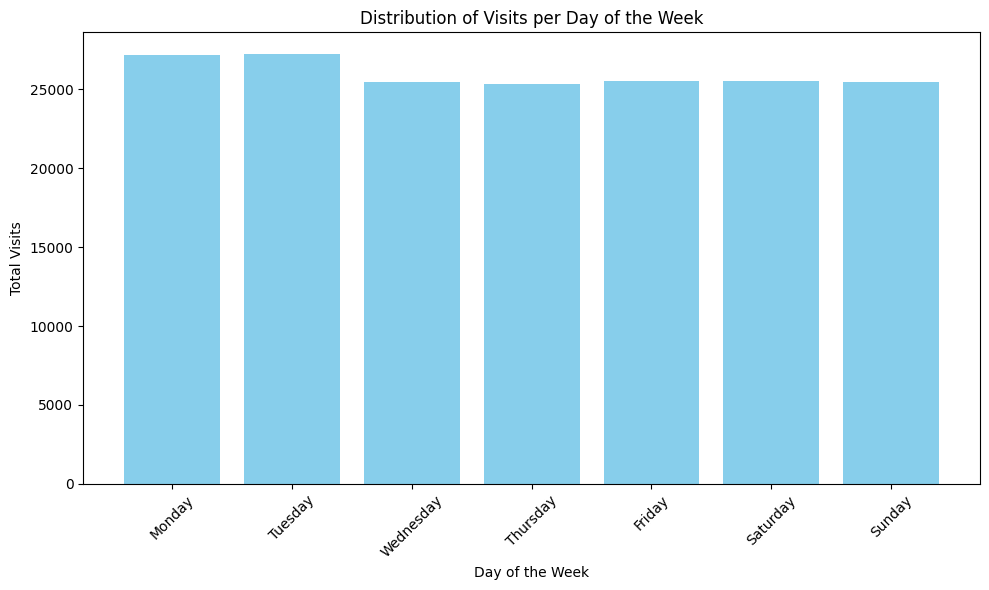

In [10]:


# Check if 'date' column exists in your DataFrame
if 'date' not in df.index:
    # Create a new 'date' column based on a date range or other datetime data
    start_date = '2024-01-01'
    end_date = '2024-04-10'
    date_range = pd.date_range(start=start_date, end=end_date, periods=len(df))  # Adjust periods as needed

    df['date'] = date_range

# Ensure 'date' column is correctly set as datetime
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Calculate total visits per day of the week
visits_per_day = df.groupby('day_of_week')['employee_count'].sum()

# Labels for days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting total visits per day of the week
plt.figure(figsize=(10, 6))
plt.bar(days, visits_per_day, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Visits')
plt.title('Distribution of Visits per Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


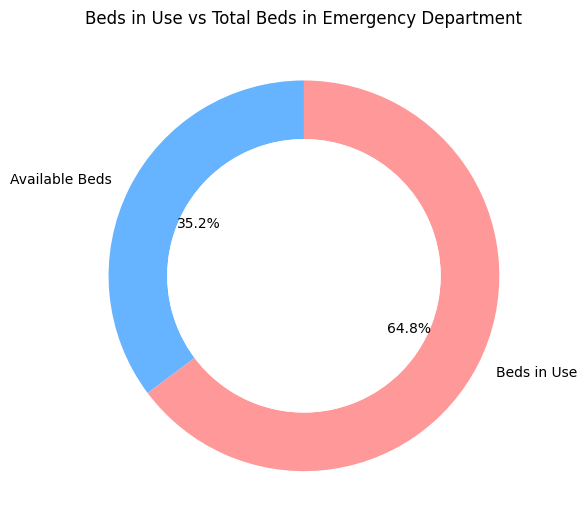

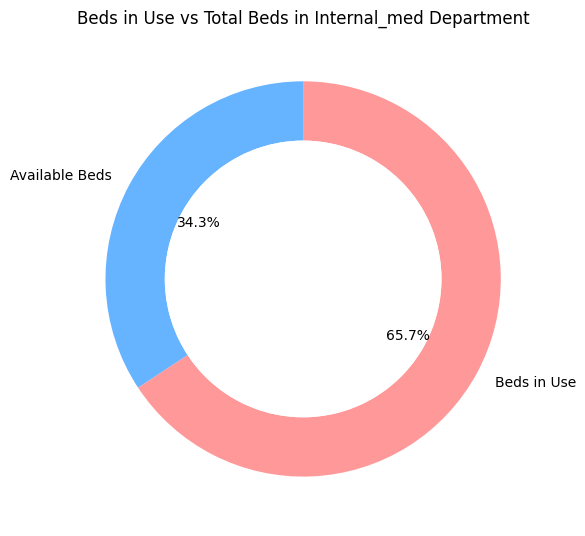

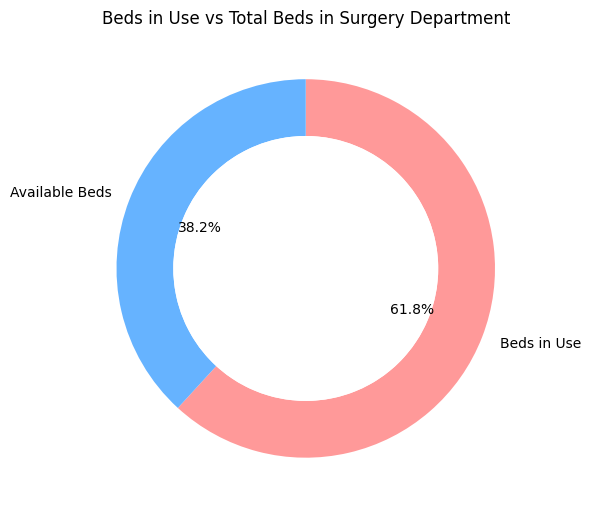

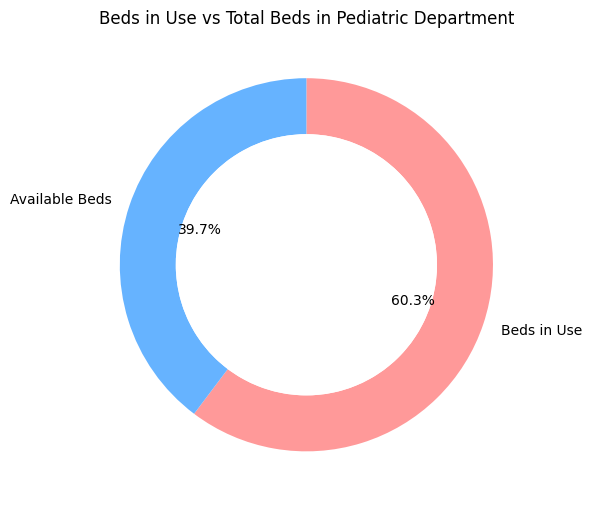

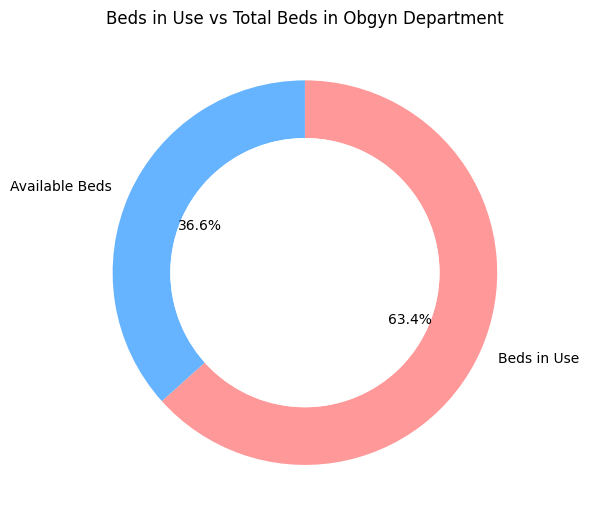

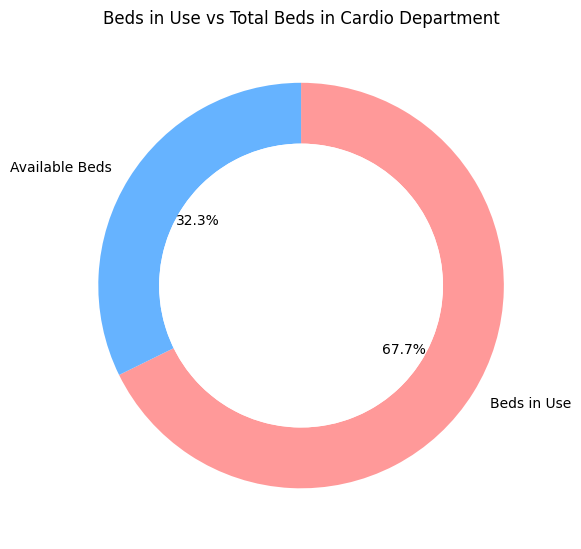

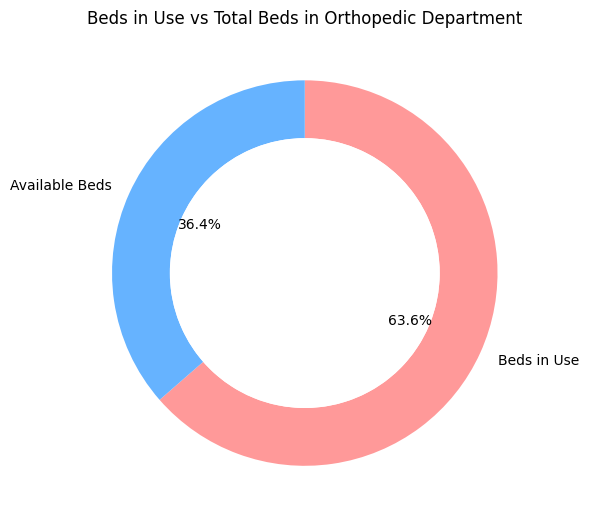

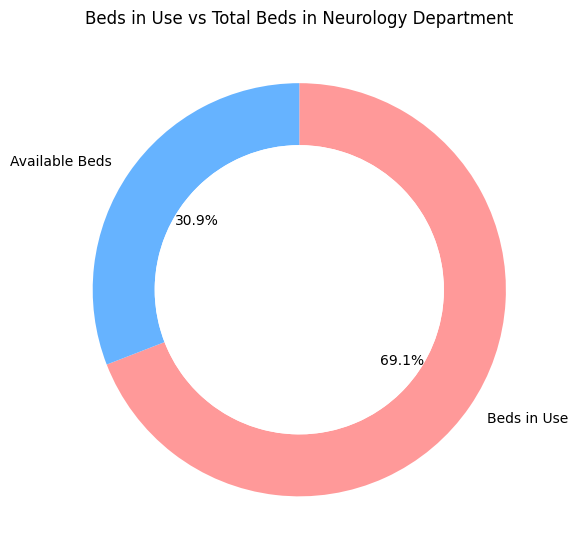

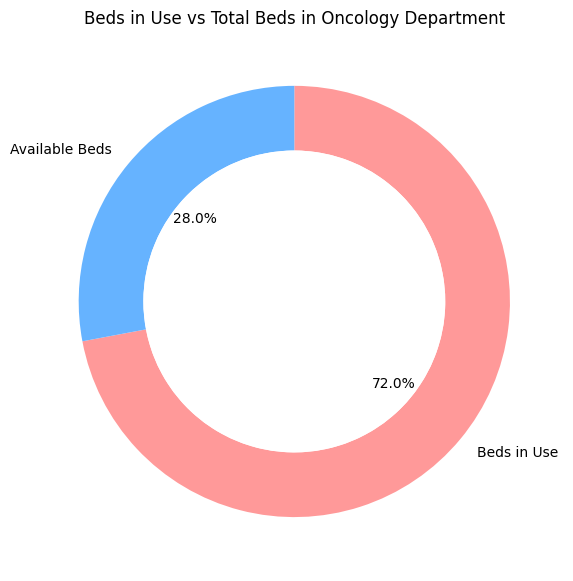

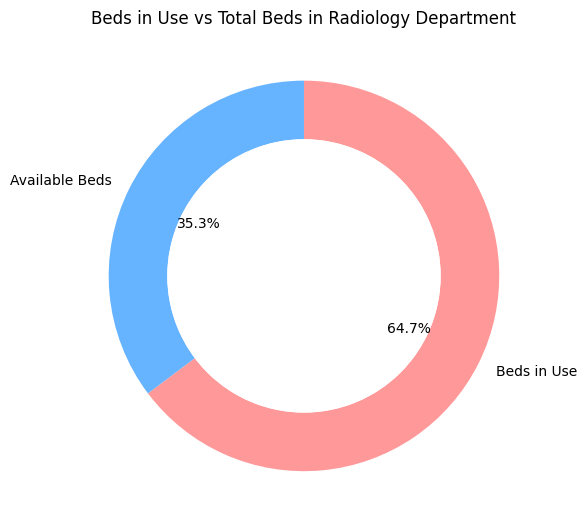

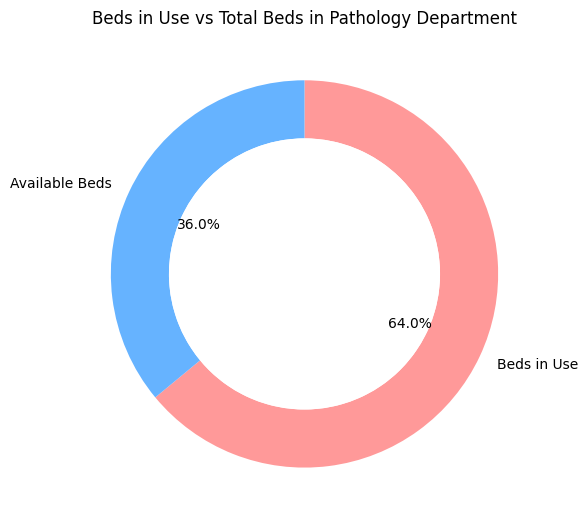

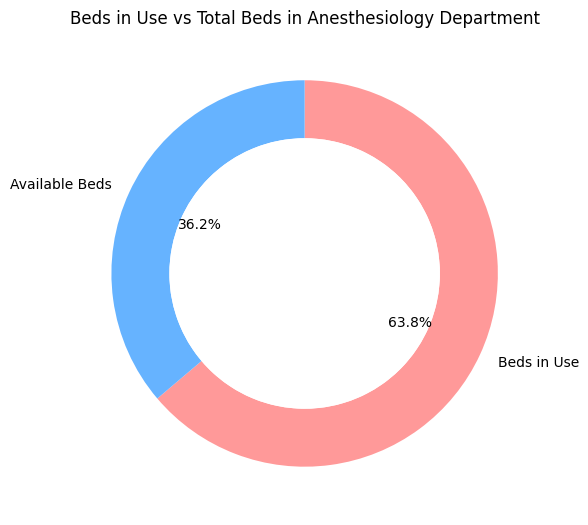

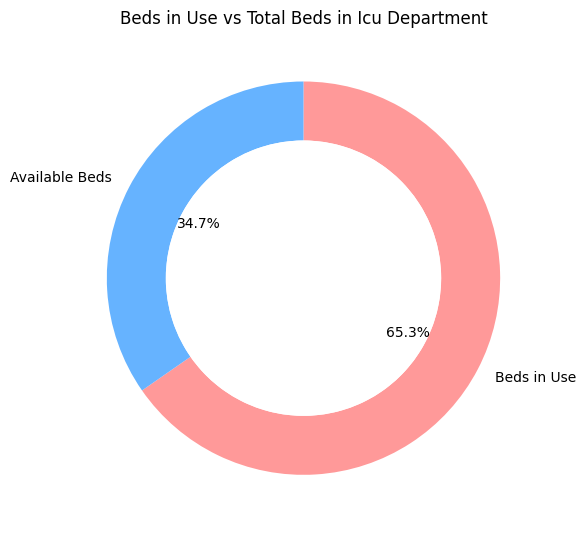

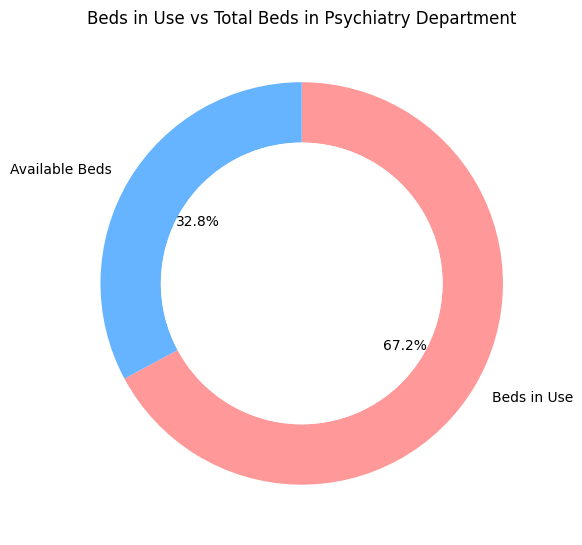

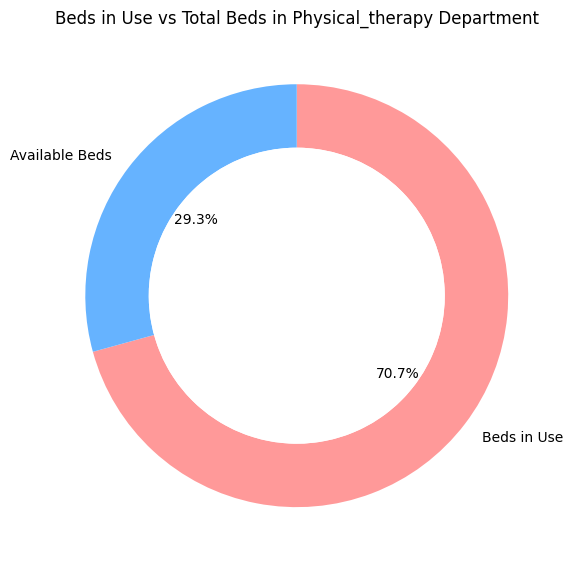

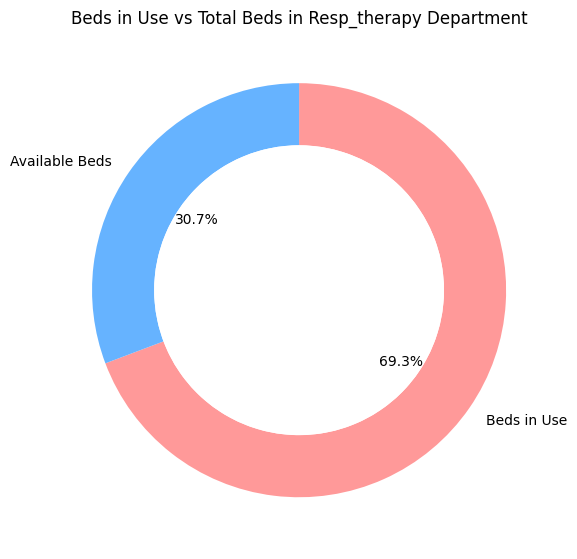

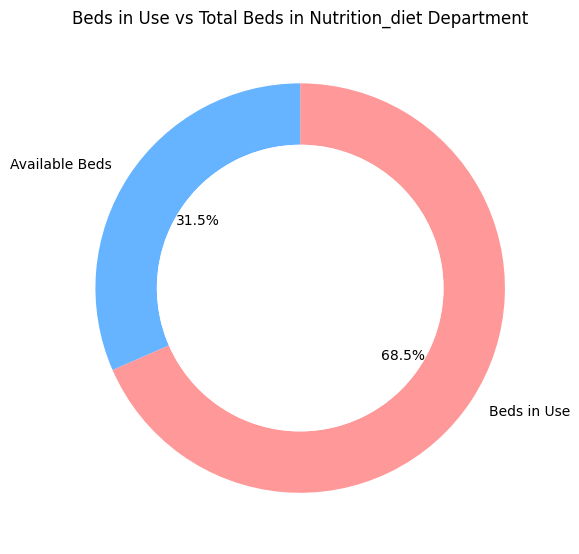

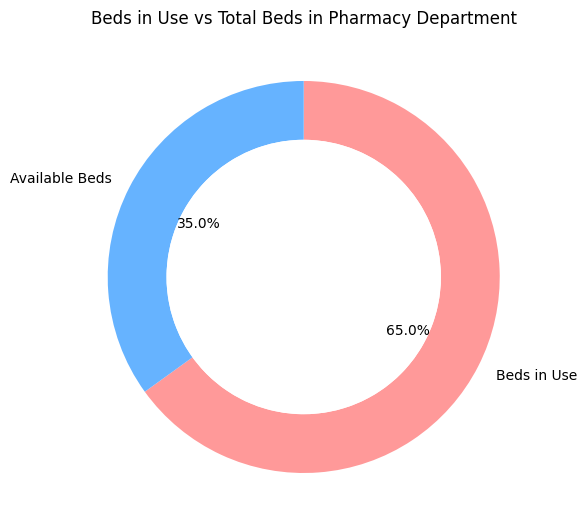

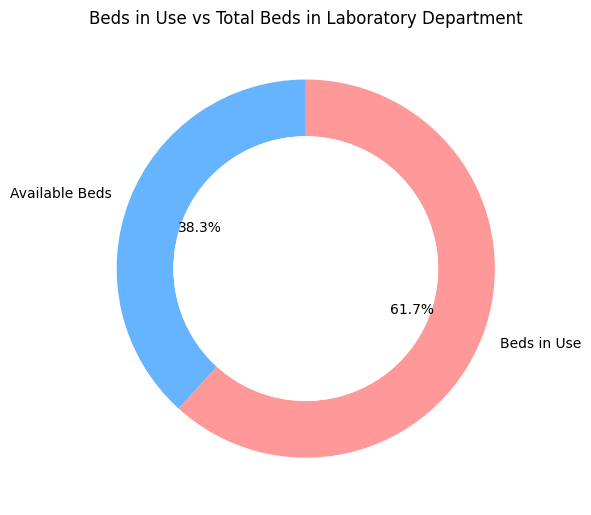

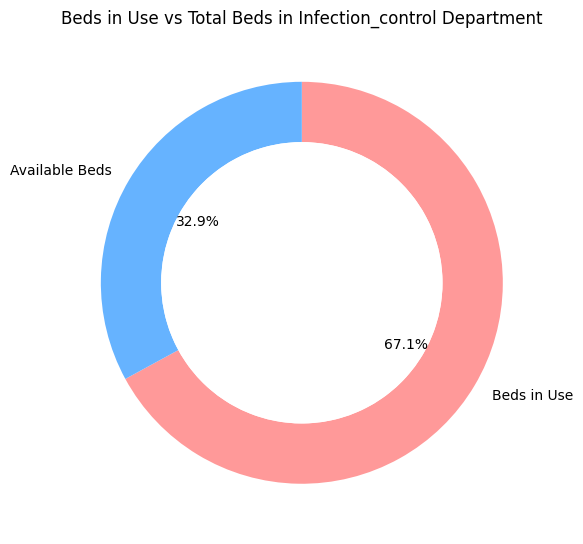

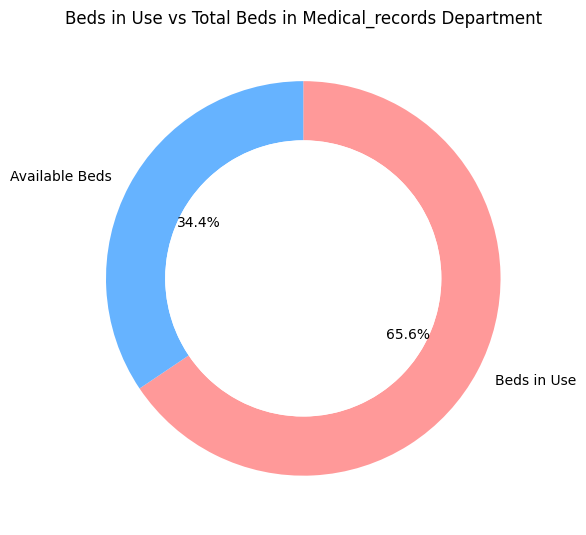

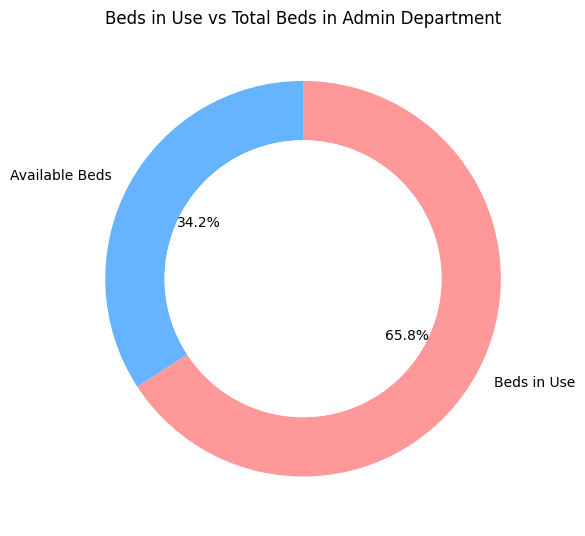

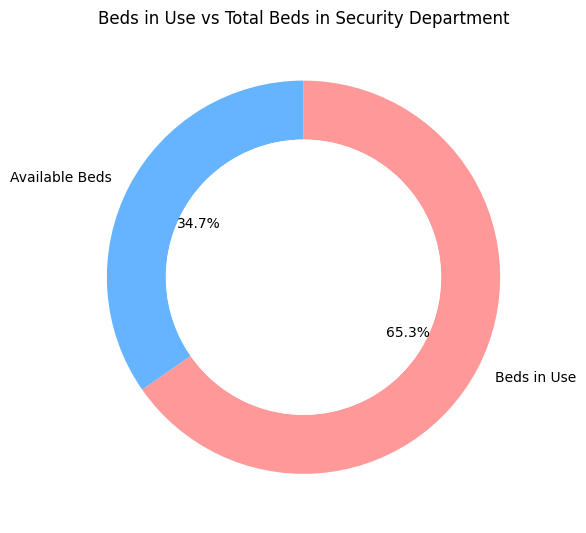

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Ensure that the DataFrame is correctly loaded
df['refer_reason'] = df['refer_reason'].str.lower()

# Get a list of all unique departments
departments = df['departments'].unique()

# Loop through each department and generate a doughnut plot
for department in departments:
    # Filter the DataFrame for the current department
    department_df = df[df['departments'] == department]
    
    # Sum the total beds and beds in use across all dates for the current department
    total_beds_in_use = department_df['beds_in_use'].sum()
    total_beds = department_df['total_beds'].sum()
    
    # Data for the doughnut plot
    sizes = [total_beds_in_use, total_beds - total_beds_in_use]
    labels = ['Beds in Use', 'Available Beds']
    colors = ['#ff9999','#66b3ff']
    
    # Create a doughnut plot
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3),
            autopct='%1.1f%%')
    
    # Add a circle at the center to make it a doughnut plot
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Beds in Use vs Total Beds in {department.capitalize()} Department')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['refer_reason'] = df['refer_reason'].str.lower()

# Get a list of all unique departments
departments = df['departments'].unique()

# Loop through each department and generate a plot
for department in departments:
    # Filter the DataFrame for the current department
    department_df = df[df['departments'] == department]
    #  df[df['departments'] == 'security']

    # Get the top 16 refer reasons and their counts for the current department
    top_refer_reasons_department = department_df['refer_reason'].value_counts().head(16)

    # Plot the data
    plt.figure(figsize=(10, 8))
    top_refer_reasons_department.plot(kind='barh', rot=0, color='blue')
    plt.xlabel('Counts')
    plt.ylabel('Refer Reason')
    plt.title(f'Refer Reasons for {department.capitalize()} Department')
    plt.tight_layout()
    plt.show()


In [4]:
# Calculate the average employee count for each department
average_employee_count = df.groupby('departments')['employee_turnover'].mean()

# Display the average employee count
print(average_employee_count)

departments
admin                0.03
anesthesiology       0.03
cardio               0.03
emergency            0.03
icu                  0.03
infection_control    0.03
internal_med         0.03
laboratory           0.03
medical_records      0.03
neurology            0.03
nutrition_diet       0.03
obgyn                0.03
oncology             0.03
orthopedic           0.03
pathology            0.03
pediatric            0.03
pharmacy             0.03
physical_therapy     0.03
psychiatry           0.03
radiology            0.03
resp_therapy         0.03
security             0.03
surgery              0.03
Name: employee_turnover, dtype: float64


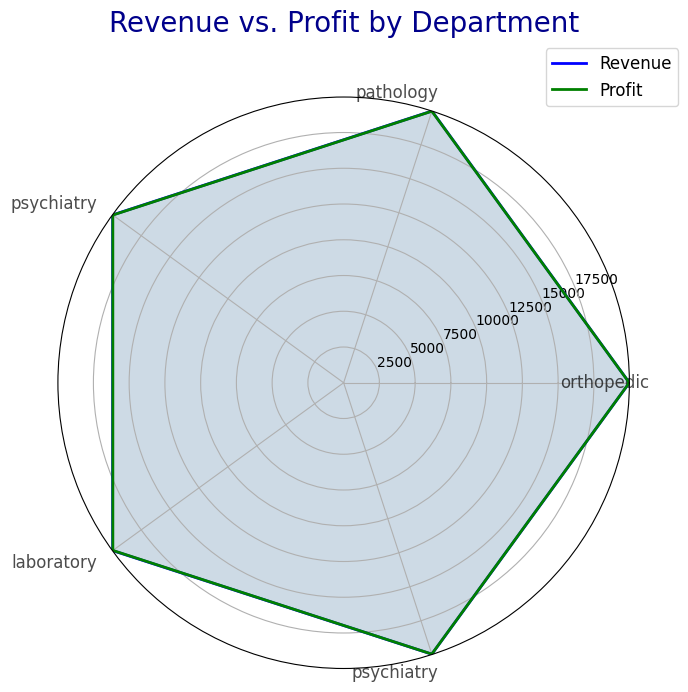

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Sort by revenue and extract top 5 departments
sorted_df = df.sort_values(by='daily_revenue', ascending=False).head()

# Departments for the spider chart
departments = sorted_df['departments'].tolist()

# Extract revenue and profit data
revenue = sorted_df['daily_revenue'].tolist()
profit = sorted_df['daily_profit'].tolist()

# Define angles for each department (ensure equal spacing)
angles = [n / float(len(departments)) * 2 * np.pi for n in range(len(departments))]
angles += angles[:1]  # Complete the loop

# Append the first value to the end to close the plot
revenue += revenue[:1]
profit += profit[:1]

# Create a spider chart
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

# Plot revenue and profit lines
ax.plot(angles, revenue, 'b-', linewidth=2, label='Revenue')
ax.fill(angles, revenue, 'b', alpha=0.1)
ax.plot(angles, profit, 'g-', linewidth=2, label='Profit')
ax.fill(angles, profit, 'g', alpha=0.1)

# Add department labels at angles
plt.xticks(angles[:-1], departments, fontsize=12, ha='right', alpha=0.7)

# Set title
plt.title('Revenue vs. Profit by Department', size=20, color='darkblue', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


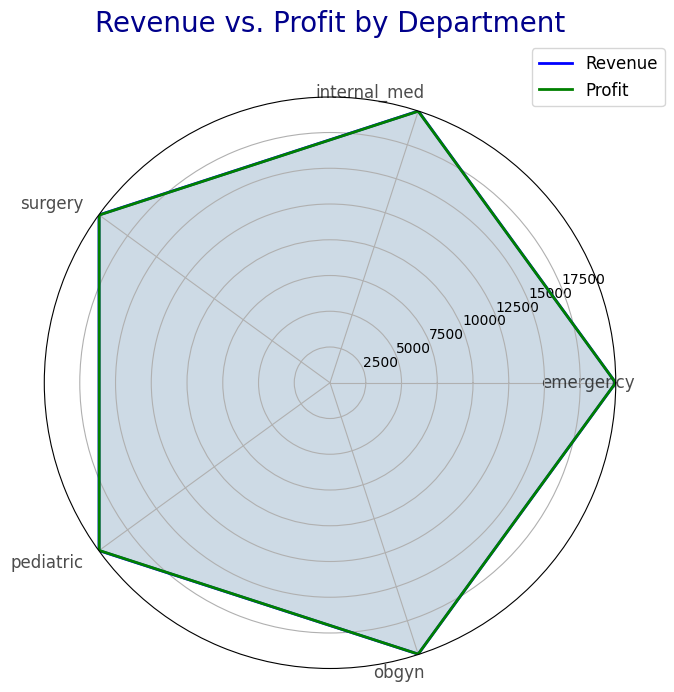

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Departments for the spider chart
departments = df['departments'].head().tolist()

# Extract revenue and cost data
revenue = df['daily_revenue'].sort_values(ascending=False).head().tolist()
profit = df['daily_profit'].sort_values(ascending=False).head().tolist()

# Define angles for each department (ensure equal spacing)
angles = [n / float(len(departments)) * 2 * np.pi for n in range(len(departments))]
angles += angles[:1]  # Complete the loop

# Append the first value to the end to close the plot
revenue += revenue[:1]
profit += profit[:1]

# Create a spider chart
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

# Plot revenue and cost lines
ax.plot(angles, revenue, 'b-', linewidth=2, label='Revenue')
ax.fill(angles, revenue, 'b', alpha=0.1)
ax.plot(angles, profit, 'g-', linewidth=2, label='Profit')
ax.fill(angles, profit, 'g', alpha=0.1)

# Add department labels at angles
plt.xticks(angles[:-1], departments, fontsize=12, ha='right', alpha=0.7)

# Set title
plt.title('Revenue vs. Profit by Department', size=20, color='darkblue', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<Axes: ylabel='date'>

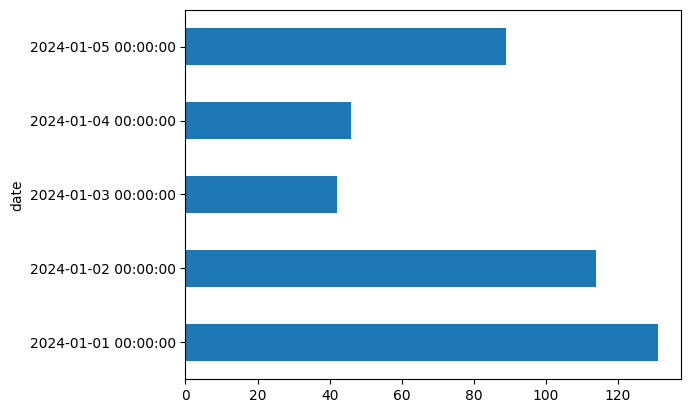

In [36]:
df['employee_count'].head().plot(kind='barh')

NameError: name 'plt' is not defined

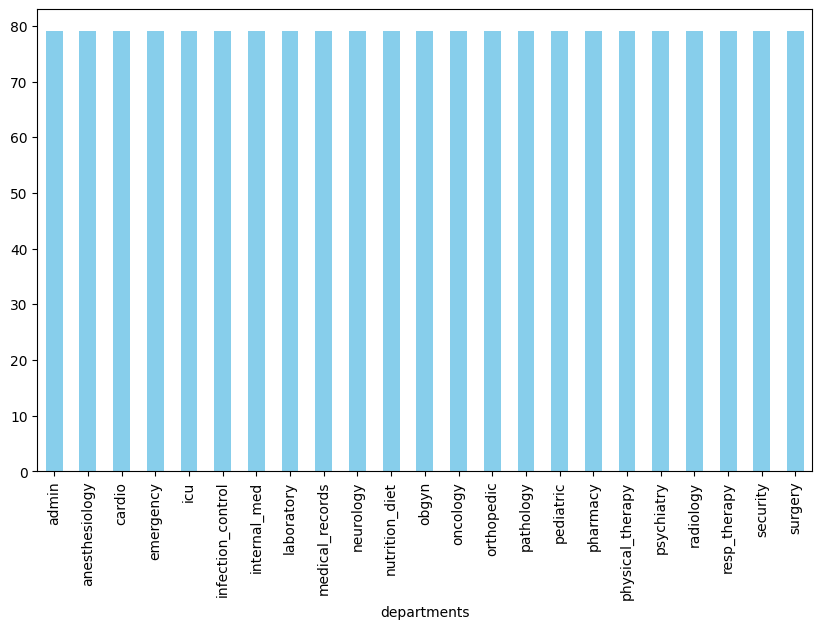

In [32]:
average_employee_count = df.groupby('departments')['employee_count'].mean()

# Plot the average employee count
average_employee_count.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Employee Count per Department')
plt.xlabel('Department')
plt.ylabel('Average Employee Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import plotly.graph_objects as go

# Define colors for gauge steps (adjust as needed)
step_colors = ['lightgreen', 'yellow', 'red']

# Create a base figure object (reusable)
fig = go.Figure()

for department in df['departments'].unique():
  # Filter data for the current department
  department_data = df[df['departments'] == department]

  # Extract daily readmission value
  value = department_data['daily_readmission'].values[0]

  # Update gauge attributes based on department data
  gauge = go.Indicator(
      mode="gauge+number",
      value=value,
      #title={'text': f"Daily Readmission - {department.capitalize()}"},
      gauge={
          'axis': {'range': [0, 10]},  # Define the range for the gauge
          'bar': {'color': "darkblue"},
          'steps': [
              {'range': [0, 3], 'color': step_colors[0]},
              {'range': [3, 7], 'color': step_colors[1]},
              {'range': [7, 10], 'color': step_colors[2]}
          ],
          'threshold': {
              'line': {'color': "red", 'width': 0.5},
              'thickness': 0.5,
              'value': 7  # You can define a threshold if needed
          }
      }
  )

  # Add the gauge to the figure (reusable figure)
  fig.add_trace(gauge)

# Update layout for all gauges at once
fig.update_layout(height=250, margin={'t': 0, 'b': 0, 'l': 0, 'r': 0}, title='Daily Readmission Rates by Department')
fig.show()
